In [ ]:
# Version made in VSC to run in the server properly

In [2]:
# Modify a little bit the images and split them into training and testing data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

# DataSet Generator
datagen = ImageDataGenerator(
  rescale = 1. / 255, # Normalize images
  validation_split = 0.2 # % of images for testing
)

data_gen_entrenamiento = datagen.flow_from_directory("data\dataset",
                                                     target_size=(224,224),
                                                     batch_size=32,shuffle=True,
                                                     subset="training")

data_gen_pruebas = datagen.flow_from_directory("data\dataset",
                                                     target_size=(224,224),
                                                     batch_size=32,shuffle=True,
                                                     subset="validation")

Found 800 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


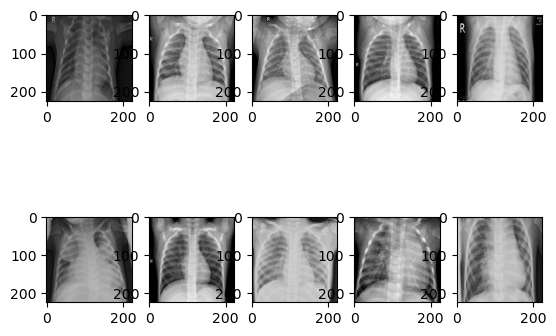

In [3]:
# Show some of our images

import matplotlib.pyplot as plt

for imagenes, etiquetas in data_gen_entrenamiento:
  for i in range(10):
    plt.subplot(2,5, i+1)
    plt.imshow(imagenes[i])

  break

plt.show()

In [10]:
# Create the model

import tensorflow as tf

# Define the model
modelo = tf.keras.Sequential([
  tf.keras.layers.Conv2D(32,(3,3), input_shape=(224,224,3), activation="relu"),
  tf.keras.layers.MaxPooling2D(2,2),

  tf.keras.layers.Conv2D(32,(3,3), input_shape=(224,224,3), activation="relu"),
  tf.keras.layers.MaxPooling2D(2,2),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(units=100, activation="relu"),
  tf.keras.layers.Dense(2, activation='softmax')
])

C:\Users\eobga\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [11]:
# Compile the model
modelo.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics = ["accuracy"]
)

In [13]:
EPOCAS = 11
entrenamiento = modelo.fit(
    data_gen_entrenamiento, epochs=EPOCAS,batch_size=32,
    validation_data=data_gen_pruebas
)

Epoch 1/11
25/25 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 1.0000 - loss: 1.5839e-04 - val_accuracy: 0.7600 - val_loss: 1.4973
Epoch 2/11
25/25 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 1.0000 - loss: 1.3708e-04 - val_accuracy: 0.7600 - val_loss: 1.3622
Epoch 3/11
25/25 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 1.0000 - loss: 1.3945e-04 - val_accuracy: 0.7600 - val_loss: 1.4090
Epoch 4/11
25/25 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 1.0000 - loss: 1.3126e-04 - val_accuracy: 0.7600 - val_loss: 1.1668
Epoch 5/11
25/25 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 1.0000 - loss: 1.0031e-04 - val_accuracy: 0.7650 - val_loss: 1.1506
Epoch 6/11
25/25 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 1.0000 - loss: 9.8764e-05 - val_accuracy: 0.7600 - val_loss: 1.2664
Epoch 7/11
25/25 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 1.0000 - loss: 6.5382e-05 - val_accuracy: 0.7500 - val_loss: 1.2921
Epoch 8/11
25/25 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 1.0000 - loss: 7.2038e-05 - 

In [15]:
# Function to test with any image
from PIL import Image
import cv2

def categorizar(ruta):
  img = Image.open(ruta)
  img = img.convert("RGB")
  img = np.array(img).astype(float)/255

  img = cv2.resize(img, (224,224))
  prediccion = modelo.predict(img.reshape(-1,224,224,3))
  return np.argmax(prediccion[0], axis = -1)

In [16]:
# Function to convert 0 to normal and 1 to pneumonia

def prediction(file):
  ruta = file
  prediccion = categorizar(ruta)

  if prediccion == 0:
    return "Normal"
  else:
    return "Pneumony"


In [17]:
prediction("normal.jpeg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 506ms/step


'Normal'